<a href="https://colab.research.google.com/github/AlinaMidhath/python_fundamentals/blob/main/DS_20_11_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np


In [21]:
beml = pd.read_csv('BEML.csv')
glaxo = pd.read_csv('GLAXO.csv')

In [22]:
beml[0:5]


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [23]:
glaxo[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [24]:
beml = beml[['Date','Close']]
glaxo = glaxo[['Date','Close']]

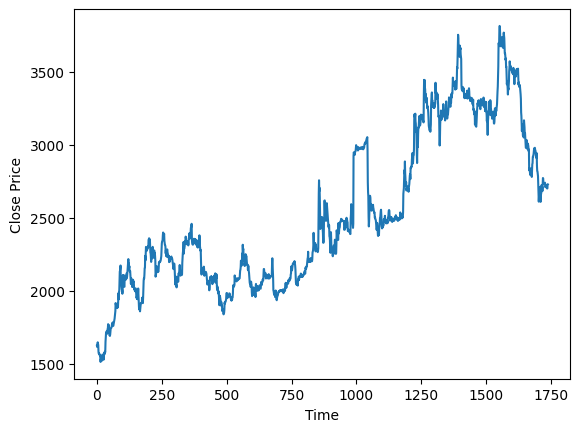

In [25]:

import matplotlib.pyplot as plt
import seaborn as sn
plt.plot(glaxo.Close)
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.show()

Here on x axis we are not getting the date values, but we want it to understand which year the stock in going up and which year it is going down
And therefore we are creating a datetime column that stores Dates in the index and that index will be on X axis

In [26]:
'''The DataFrames have a date column, so we can
create a DatetimeIndex index from this column Date. It will ensure that the rows are sorted by time in
ascending order.'''
glaxo = glaxo.set_index(pd.DatetimeIndex(glaxo['Date']))
beml = beml.set_index(pd.DatetimeIndex(beml['Date']))

In [27]:
beml

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05
...,...,...
2016-12-26,2016-12-26,950.25
2016-12-27,2016-12-27,975.70
2016-12-28,2016-12-28,974.40


In [28]:
glaxo

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80
...,...,...
2016-12-26,2016-12-26,2723.50
2016-12-27,2016-12-27,2701.75
2016-12-28,2016-12-28,2702.15


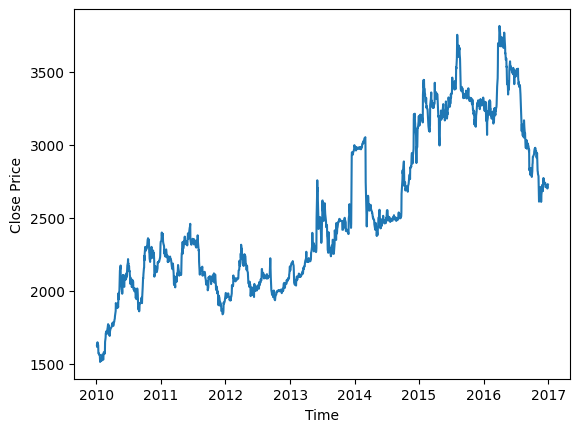

In [29]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.plot(glaxo.Close)
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.show()

So here wecan clearly understand which year stock was high and which year it was low


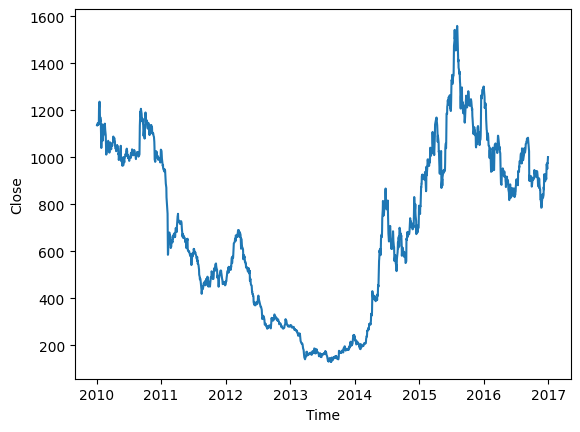

In [30]:
plt.plot(beml.Close);
plt.xlabel('Time');
plt.ylabel('Close');

Calculating the Percentage gain and storing in a new column 'gain'

In [31]:
glaxo['gain'] = glaxo.Close.pct_change(periods = 1)
beml['gain'] = beml.Close.pct_change(periods = 1)
beml
glaxo

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


First row value in gain col iis null bcs we dont have a prev record for first row so we will drop that row in both dfs(beml and glaxo)


In [32]:
#drop first row since it is NaN
glaxo = glaxo.dropna()
beml = beml.dropna()
glaxo

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
2010-01-11,2010-01-11,1629.45,-0.006312
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


In [33]:
glaxo.isnull().sum()

,0
Date,0
Close,0
gain,0


In [34]:
beml.isnull().sum()

,0
Date,0
Close,0
gain,0


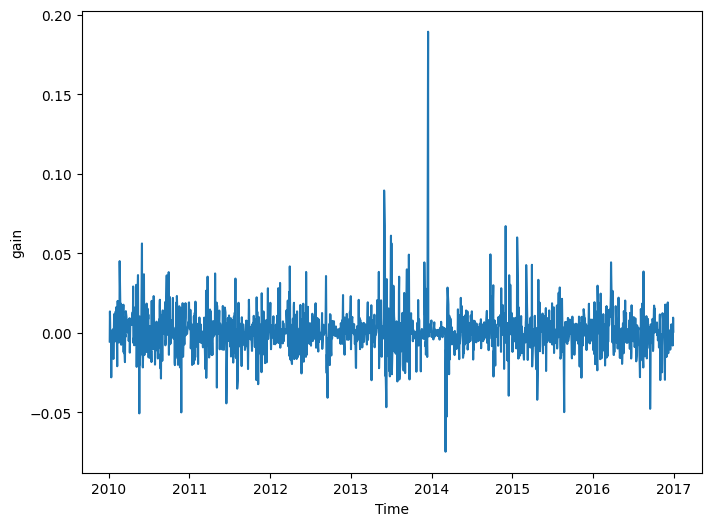

In [35]:
#Plot the gains
plt.figure(figsize = (8, 6))
plt.plot(glaxo.index, glaxo.gain)
plt.xlabel('Time')
plt.ylabel('gain')
plt.show()

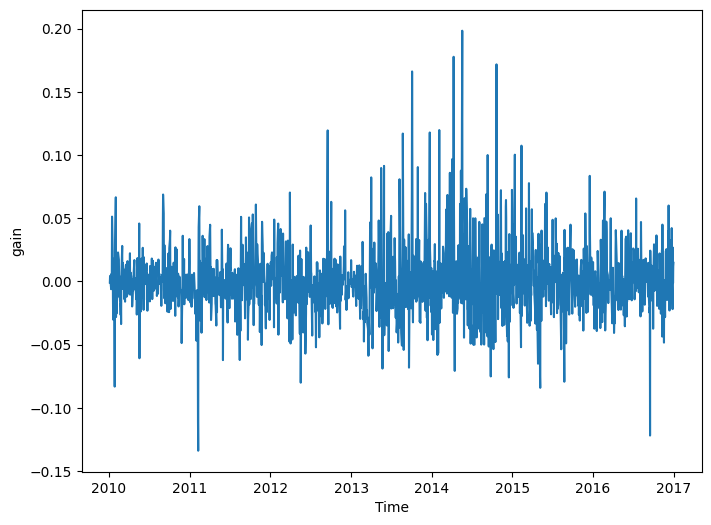

In [36]:
#Plot the gains
plt.figure(figsize = (8, 6))
plt.plot(beml.index, beml.gain)
plt.xlabel('Time')
plt.ylabel('gain')
plt.show()

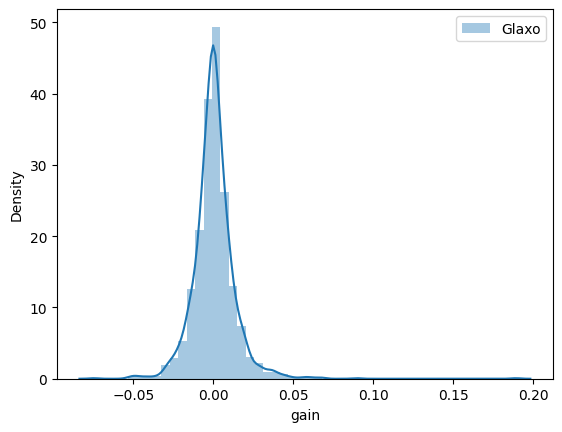

In [37]:
import warnings
warnings.filterwarnings('ignore')
sn.distplot(glaxo.gain, label = 'Glaxo')
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()
plt.show()

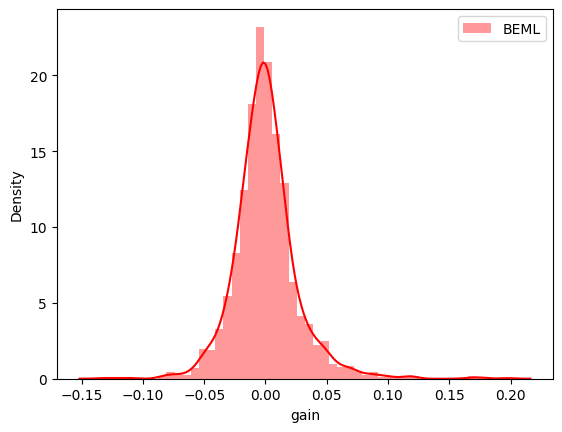

In [39]:
sn.distplot(beml.gain, label = 'BEML',color="r")
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()
plt.show()

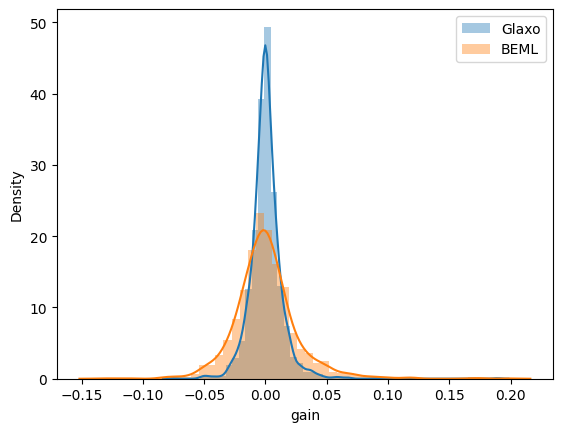

In [40]:
X = pd.DataFrame(columns = ["beml_df.gain","glaxo_df.gain"])# new dataframe with 2 empty cols and there names are specified
X["beml_df.gain"] = pd.Series(beml.gain) # inserting the values og gain col of beml(1D data )
X["glaxo_df.gain"] = pd.Series(glaxo.gain) #inserting the values og gain col of glaxo(1D data )
sn.distplot(X['glaxo_df.gain'],label = 'Glaxo')
sn.distplot(X['beml_df.gain'],label = 'BEML')
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()

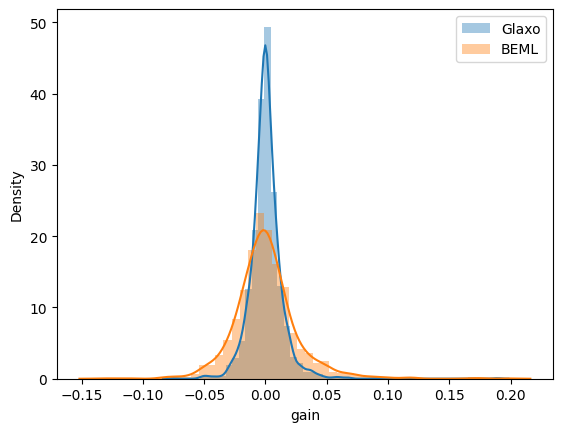

In [41]:
X = pd.DataFrame(columns = ["beml_df.gain","glaxo_df.gain"])
X
X["beml_df.gain"] = pd.Series(beml.gain)
X
X["glaxo_df.gain"] = pd.Series(glaxo.gain)
X
sn.distplot(X['glaxo_df.gain'],label = 'Glaxo')
sn.distplot(X['beml_df.gain'],label = 'BEML')
plt.legend()
plt.xlabel("gain")
plt.show()

In [42]:
glaxo['gain'].mean()

0.0003860410825922916

In [43]:
beml['gain'].mean()

0.0002707480790572326

In [44]:
print('Mean:', np.round(glaxo.gain.mean(), 4))
print('Standard Deviation: ', np.round(glaxo.gain.std(), 4))

Mean: 0.0004
Standard Deviation:  0.0134


In [45]:
print('Mean: ', np.round(beml.gain.mean(), 4))
print('Standard Deviation: ', np.round(beml.gain.std(), 4))

Mean:  0.0003
Standard Deviation:  0.0264


**Q2 - Probability of making 2% loss or higher**

In [46]:
from scipy import stats
#Probability of making 2% loss or higher in Glaxo
stats.norm.cdf( -0.02,
glaxo.gain.mean(),
glaxo.gain.std())

0.06352488667177397

OR


In [47]:
from scipy import stats
stats.norm.cdf(-0.02, glaxo.gain.mean(), glaxo.gain.std())

0.06352488667177397

In [48]:
#Probability of making 2% loss or higher in beml
stats.norm.cdf( -0.02,
loc=beml.gain.mean(),
scale=beml.gain.std())

0.22155987503755287

In [50]:
from scipy import stats
stats.norm.cdf(-0.02, beml.gain.mean(), beml.gain.std())

0.22155987503755287

In [51]:
# Probability of making 2% gain or higher in Beml
1-stats.norm.cdf(0.02,
loc=beml.gain.mean(),
scale=beml.gain.std())

0.22769829484075355

In [52]:
# prompt: import basic libraries in python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

In [53]:
# prompt:  can you read this two files /content/BEML.csv and /content/GLAXO.csv


# Assuming the files are in the /content directory
beml = pd.read_csv('/content/BEML.csv')
glaxo = pd.read_csv('/content/GLAXO.csv')

# ... (rest of your code from the provided example) ...

In [57]:
# prompt: can you select two columns like date and close column from beml_df and glaxo_df and store it in beml_df and glaxo_df

beml_df = beml[['Date','Close']]
glaxo_df = glaxo[['Date','Close']]

In [58]:
# prompt:  Can you check the datatypes of columns in beml_df and glaxo_df

# Assuming the files are in the /content directory


print("Data types of columns in beml_df:")
print(beml_df.dtypes)

print("\nData types of columns in glaxo_df:")
print(glaxo_df.dtypes)

Data types of columns in beml_df:
Date      object
Close    float64
dtype: object

Data types of columns in glaxo_df:
Date      object
Close    float64
dtype: object


In [59]:
# prompt: can you convert the date column in beml_df and glaxo_df in th DateTime datatype and store it as index

# Assuming the files are in the /content directory


# Convert 'Date' column to datetime and set as index
beml_df['Date'] = pd.to_datetime(beml_df['Date'])
beml_df = beml_df.set_index('Date')

glaxo_df['Date'] = pd.to_datetime(glaxo_df['Date'])
glaxo_df = glaxo_df.set_index('Date')

print("Data types of columns in beml_df:")
print(beml_df.dtypes)

print("\nData types of columns in glaxo_df:")
glaxo_df.dtypes

Data types of columns in beml_df:
Close    float64
dtype: object

Data types of columns in glaxo_df:


,0
Close,float64


In [60]:
beml_df

,Close
Date,
2010-01-04,1135.60
2010-01-05,1134.60
2010-01-06,1139.60
2010-01-07,1144.15
2010-01-08,1144.05
...,...
2016-12-26,950.25
2016-12-27,975.70
2016-12-28,974.40


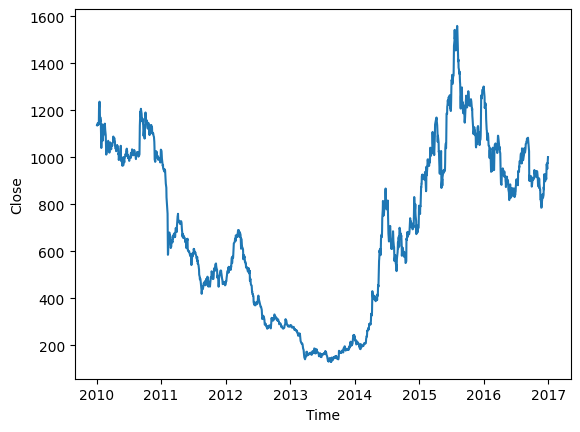

In [61]:
# prompt: plot my beml_df

import matplotlib.pyplot as plt

plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close');
plt.show()